<a href="https://colab.research.google.com/github/trillium06/Lab2/blob/main/2F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

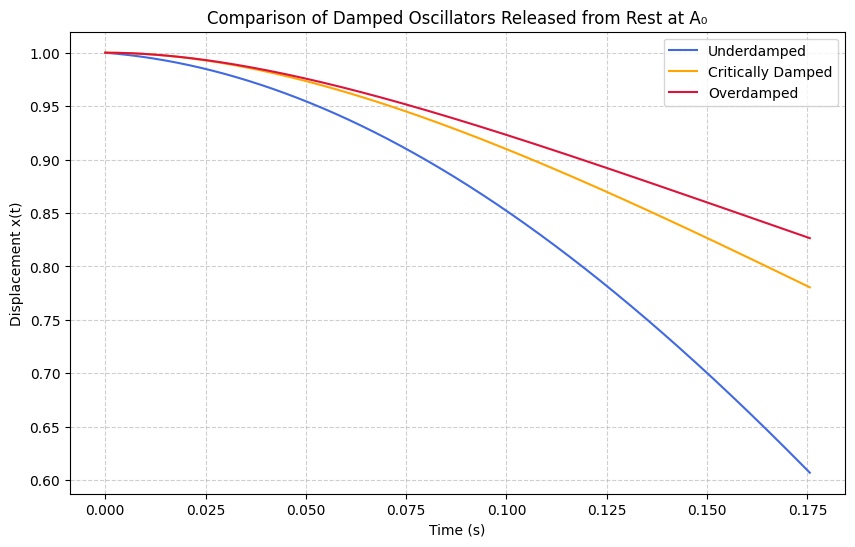

Time when underdamped energy drops by 10%: t₁₀ = 0.176 s


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
A0 = 1.0            # initial amplitude
omega0 = 5.0        # natural frequency (rad/s)
alpha_under = 0.3   # underdamped (α < ω0)
alpha_crit = omega0 # critically damped (α = ω0)
alpha_over = 8.0    # overdamped (α > ω0)

# --- Time range ---
# Energy ∝ e^(-2αt), so for 10% energy loss: E/E0 = 0.9 = e^(-2αt)
t_10 = -np.log(0.9) / (2 * alpha_under)
t = np.linspace(0, t_10, 1000)

# --- Solutions ---
# Underdamped: ω1 = sqrt(ω0^2 - α^2)
omega1 = np.sqrt(omega0**2 - alpha_under**2)
x_under = A0 * np.exp(-alpha_under * t) * np.cos(omega1 * t)

# Critically damped: x = (A + Bt)e^(-αt); start from rest, x(0)=A0, x'(0)=0
A = A0
B = alpha_crit * A0
x_crit = (A + B*t) * np.exp(-alpha_crit * t)

# Overdamped: two real exponentials
r1 = -alpha_over + np.sqrt(alpha_over**2 - omega0**2)
r2 = -alpha_over - np.sqrt(alpha_over**2 - omega0**2)
# Constants chosen for x(0)=A0, x'(0)=0
C1 = A0 * (r2 / (r2 - r1))
C2 = A0 * (-r1 / (r2 - r1))
x_over = C1 * np.exp(r1 * t) + C2 * np.exp(r2 * t)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(t, x_under, label="Underdamped", color='royalblue')
plt.plot(t, x_crit, label="Critically Damped", color='orange')
plt.plot(t, x_over, label="Overdamped", color='crimson')
plt.title("Comparison of Damped Oscillators Released from Rest at A₀")
plt.xlabel("Time (s)")
plt.ylabel("Displacement x(t)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Time when underdamped energy drops by 10%: t₁₀ = {t_10:.3f} s")